In [19]:
import torch
import torchvision
import torchvision.transforms as transforms

In [20]:
transform = transforms.Compose(
    [
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)


In [21]:
trainset = torchvision.datasets.CIFAR10(root = "./cifar10-data",
                                       train = True, transform = transform , download = True)
trainloader = torch.utils.data.DataLoader(trainset , batch_size = 32,
                                         shuffle = True , num_workers = 3 , pin_memory=True)

testset = torchvision.datasets.CIFAR10(
    root = "./cifar10-data" , train = False , download = True, transform = transform
)

testloader = torch.utils.data.DataLoader(
    testset , batch_size = 4 , shuffle = False , num_workers=2 , pin_memory=True
)

Files already downloaded and verified
Files already downloaded and verified


 bird horse   car plane


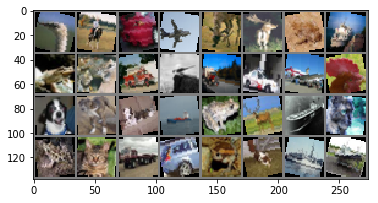

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

classes = ('plane', 'car', 'bird', 'cat',
'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [23]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,32,3,padding = 1)
        self.bnorm1 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(2)
        self.dropout1 = nn.Dropout2d(0.2)
        self.conv1_2 = nn.Conv2d(32 , 32 , 3 , padding = 1)
        
        self.conv2 = nn.Conv2d(32,64,3,padding = 1)
        self.bnorm2 = nn.BatchNorm2d(64)
        self.conv2_1 = nn.Conv2d(64,64,3,padding=1)
        self.pool2 = self.pool1
        self.drop_2 = nn.Dropout2d(0.3)
        
        self.conv3 = nn.Conv2d(64,128,3,padding = 1)
        self.bnorm3 = nn.BatchNorm2d(128)
        self.conv3_1 = nn.Conv2d(128,128,3 , padding = 1)
        self.pool3 = self.pool1
        self.drop_3 = nn.Dropout(0.4)
        
        self.fc1 = nn.Linear(128*4*4 , 10)
        self.softmax = nn.Softmax()
    
    def step1(self , x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.bnorm1(x)
        x = self.conv1_2(x)
        x = F.relu(x)
        x = self.bnorm1(x)
        x = self.pool1(x)
        x = self.dropout1(x)
        return x
    
    def step2(self,x):
        x = self.conv2(x)
        x = F.relu(x)
        x = self.bnorm2(x)
        x = self.conv2_1(x)
        x = F.relu(x)
        x = self.bnorm2(x)
        x = self.pool2(x)
        x = self.drop_2(x)
        return x
    
    def step3(self,x):
        x = self.conv3(x)
        x = F.relu(x)
        x = self.bnorm3(x)
        x = self.conv3_1(x)
        x = F.relu(x)
        x = self.bnorm3(x)
        x = self.pool3(x)
        x = self.drop_3(x)
        return x
        
        
        
    def forward(self,x):
        x = self.step1(x)
        x = self.step2(x)
        x = self.step3(x)
        x = x.view(-1 , 128*4*4)
        x = self.fc1(x)
        x = F.relu(x)
        return x

In [24]:
cuda = True

In [25]:
model = Net()
if cuda:
    model.cuda()

In [26]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss().cuda()
optimizer = optim.SGD(model.parameters() , lr = 0.0003 , weight_decay=1e-5)


In [58]:
for epoch in range(20):
    running_loss = 0
    
    for i, data in enumerate(trainloader , 0):
        inputs,labels = data
        
        if cuda:
            inputs , labels = inputs.cuda() , labels.cuda()
        inputs , labels = Variable(inputs) , Variable(labels)
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data[0]
        
        if i%600 == 0:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print("Finished Training")

[1,     1] loss: 0.000
[1,   601] loss: 0.107
[1,  1201] loss: 0.110
[2,     1] loss: 0.000
[2,   601] loss: 0.107
[2,  1201] loss: 0.112
[3,     1] loss: 0.000
[3,   601] loss: 0.109
[3,  1201] loss: 0.109
[4,     1] loss: 0.000
[4,   601] loss: 0.108
[4,  1201] loss: 0.109
[5,     1] loss: 0.000
[5,   601] loss: 0.105
[5,  1201] loss: 0.108
[6,     1] loss: 0.000
[6,   601] loss: 0.104
[6,  1201] loss: 0.107
[7,     1] loss: 0.000
[7,   601] loss: 0.105
[7,  1201] loss: 0.107
[8,     1] loss: 0.000
[8,   601] loss: 0.105
[8,  1201] loss: 0.107
[9,     1] loss: 0.000
[9,   601] loss: 0.104
[9,  1201] loss: 0.104
[10,     1] loss: 0.000
[10,   601] loss: 0.105
[10,  1201] loss: 0.104
[11,     1] loss: 0.000
[11,   601] loss: 0.105
[11,  1201] loss: 0.103
[12,     1] loss: 0.000
[12,   601] loss: 0.104
[12,  1201] loss: 0.101
[13,     1] loss: 0.000
[13,   601] loss: 0.103
[13,  1201] loss: 0.104
[14,     1] loss: 0.000
[14,   601] loss: 0.098
[14,  1201] loss: 0.104
[15,     1] loss: 0

In [59]:
dataiter = iter(testloader)

images , labels = dataiter.next()



In [60]:
from matplotlib.pyplot import imshow as ims
from PIL import Image

a = model.step1(Variable(images.cuda()))[0]
b = a[0].cpu()

im = Image.fromarray(b.data.numpy())
im.show()

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship  ship plane


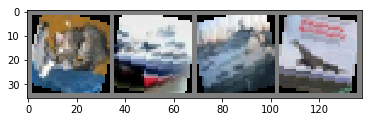

In [61]:
imshow(torchvision.utils.make_grid(images.cpu()))
print("GroundTruth: " , ' '.join('%5s'%classes[labels[j]] for j in range(4)))
if cuda:
    images , labels = images.cuda() , labels.cuda()
outputs = model(Variable(images))
_ , predicted = torch.max(outputs.data , 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

In [62]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    
    if cuda:
        images , labels = images.cuda() , labels.cuda()
    model.eval()
    outputs = model(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
100 * correct / total))

Accuracy of the network on the 10000 test images: 81 %


In [63]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    
    if cuda:
        images , labels = images.cuda() , labels.cuda()
    model.eval()
    outputs = model(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 84 %
Accuracy of   car : 90 %
Accuracy of  bird : 73 %
Accuracy of   cat : 63 %
Accuracy of  deer : 77 %
Accuracy of   dog : 74 %
Accuracy of  frog : 85 %
Accuracy of horse : 86 %
Accuracy of  ship : 88 %
Accuracy of truck : 88 %
